In [1]:
from flashcurve import image_tools as it
from flashcurve import data_tools as dt
import numpy as np
import importlib.resources
import os

In [2]:
with importlib.resources.path('flashcurve', 'gll_psc_v31.fit') as resource_path: # get list of sources and their locations
    cat_path = str(resource_path)

In [3]:
source = '4FGL J0509.4+0542'
source_n = source.replace(' ', '_')
data_dir = os.path.join('../../', source_n + '_test') # define directory where all data will be saved
source_locs = it.fits.open(cat_path)
src_indx = np.where(source_locs[1].data['Source_Name']==source)[0][0]
ra = float(source_locs[1].data['RAJ2000'][src_indx])
dec = float(source_locs[1].data['DEJ2000'][src_indx])
duration = 10*259200 # 30 days

dt.get_ul_data(ra=ra, dec=dec, data_dir=data_dir, t_int=[6e8 - duration/2, 6e8 + duration/2], get_sc=False) #download the data for some time interval centered around the position of the source
# Note: if there are fits files already in the target directory they will get deleted

Query URL https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L240809104539EB9AFA4368
Wait at least 21.0 seconds for the query to complete
delete  ../../4FGL_J0509.4+0542_test/L240809102601EB9AFA4384_PH00.fits


/Users/kristiantcho/miniforge3/envs/fermipy/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


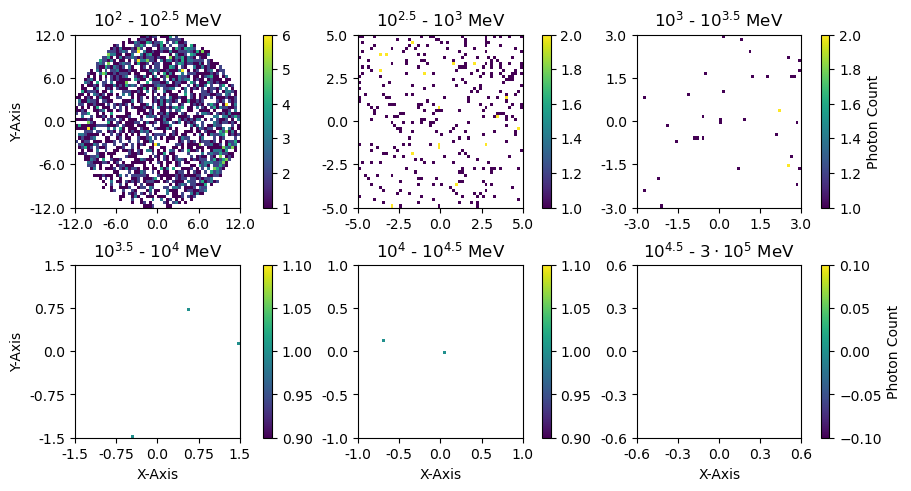

In [4]:
fermimage = it.fermimage(fermi_path=data_dir, ra=ra, dec=dec, allow_multiprocessing=False) #create fermimage object pointing to where the data is downloaded
fermi_df = fermimage.create_fermi_df() #create a pandas dataframe from the data
src_image = fermimage.make_nearby_srcs_image() #create an extra layer to show nearby sources (optional)
image = fermimage.create_2d_alt_zoom_images(fermi_df, t_int=[6e8 - duration/2, 6e8 + duration/2]) #make image array
print_image = np.rollaxis(image, 2,0) # need to roll axis to make image printable 
figure, ax = it.fermimage(image=print_image).print_alt_zoom_image() #print image array

In [5]:
ts =it.mini_predict_ts(image=image, model_path = fermimage.model_path, show_ts=True, num_threads=1) # you can also predict the TS for this image

predicted ts: [15.31278]


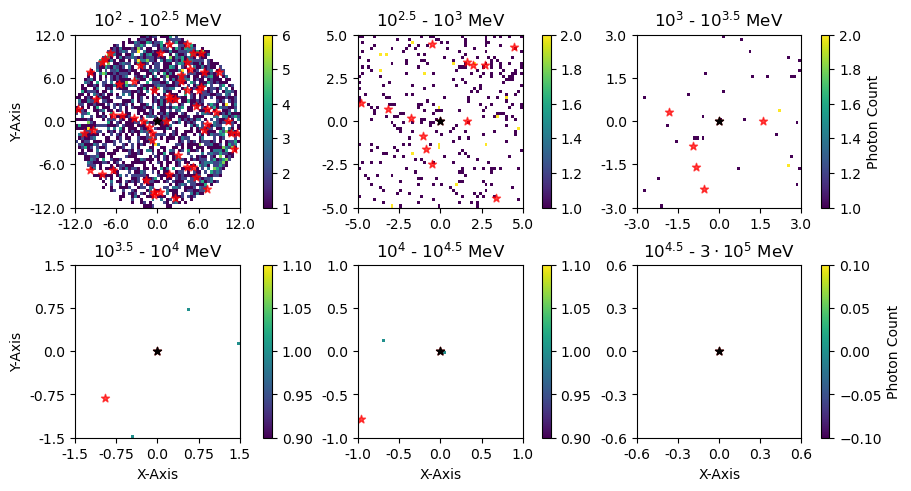

In [6]:
figure, ax = it.fermimage(image=print_image).print_alt_zoom_image(src_image=src_image, loc_only=True) # print image with nearby sources (red stars = nearby sources, black star = central source) 